# Workshop 4, Financial Econometrics II

Full instructions can be found at: https://rpubs.com/cdorante/ec2004_w4

Ricardo Andrés Cáceres Villibord
A01706972

In [1]:
from google.colab import drive

drive.mount("/content/drive")
!pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content


In [2]:
%cd "/content/drive/MyDrive/Colab Notebooks/DataScience/"
!ls

/content/drive/MyDrive/Colab Notebooks/DataScience
 auto-mpg1.data.txt  'Copy of Loading Data set.ipynb'		   iris.names
 auto-mpg.data	     'Copy of tutorial pandas extraction .ipynb'  'Módulo Estadística'
 auto-mpg.names       iaiqro.csv				   wine.data
 car.data	      Indicadores20231012114702.csv.xls		   wine.names
 CarMPG.ipynb	      iris.data


### Importar Librerias Necesarias

In [3]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st
import statsmodels.api as sm


In [4]:
df = pd.read_csv("Indicadores20231012114702.csv.xls")
df.head()

,Periodo,Indicadores
0,2003/01,65.234491
1,2003/02,64.750420
2,2003/03,61.444991
3,2003/04,64.953065
4,2003/05,59.522348


In [5]:
df = df.sort_values(by='Periodo')
df = df.reset_index(drop=True)
df.head(36)

,Periodo,Indicadores
0,2003/01,65.234491
1,2003/02,64.750420
2,2003/03,61.444991
3,2003/04,64.953065
4,2003/05,59.522348
5,2003/06,59.273040
6,2003/07,59.521204
7,2003/08,66.044043
8,2003/09,76.448073
9,2003/10,68.567827


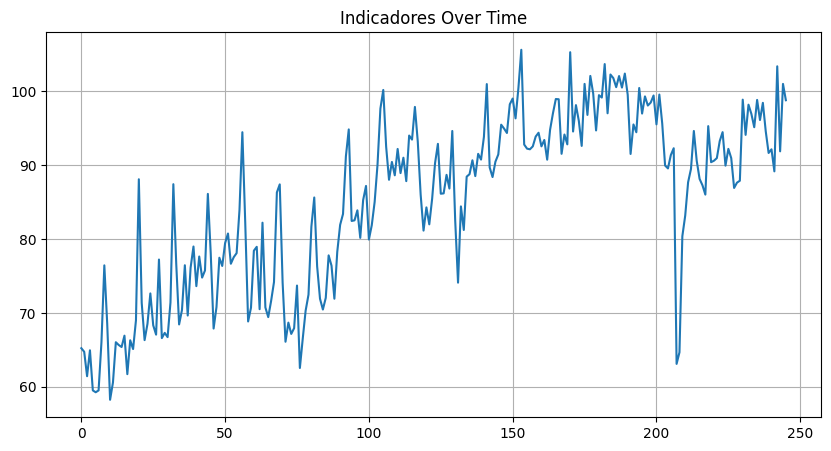

In [6]:
# Create a line plot
plt.figure(figsize=(10, 5))
plt.plot(df['Indicadores'], linestyle='-')
plt.title('Indicadores Over Time')
plt.grid(True)

# Show the plot

## Checamos la Statioinarity

In [7]:
df['log'] = np.log(df['Indicadores'])
df

,Periodo,Indicadores,log
0,2003/01,65.234491,4.177988
1,2003/02,64.750420,4.170540
2,2003/03,61.444991,4.118142
3,2003/04,64.953065,4.173665
4,2003/05,59.522348,4.086352
...,...,...,...
241,2023/02,89.168194,4.490524
242,2023/03,103.384331,4.638453
243,2023/04,91.876916,4.520450
244,2023/05,101.002534,4.615146


***Hacemos una prueba Dickey-Fuller aumentada (ADS) para determinar si la serie de tiempo es estacionaria o no. ***

En pocas palabras, se compara dos hipótesis: una que dice que los datos tienen una raíz unitaria (lo que significan que no son estacionarios) y otra que dice que lso datos son estacionarios. Ela prueba de Dickey-Fuller calcula una estadística y un valor p. Si el valor p es muy pequeño (menor que 0.05) entonces rechazamos la idea que los datos tienen una raíz unitaria y concluimos que son estacionarios.





In [8]:
from statsmodels.tsa.stattools import adfuller
dtest = adfuller(df['log'])
print(f"El ADF Statistic es {dtest[0]}")
if dtest[1] > 0.05:
  print(f"El p-value es {dtest[1]}, por lo tanto no es estacionaria")
else:
  print(f"El p-value es de {dtest[1]}, lo que significa que si es estacionaria")

El ADF Statistic es -2.0402700406367744
El p-value es 0.269199852269533, por lo tanto no es estacionaria


En este caso, podemos observar como la prueba de Dickey-Fuller nos dio un resultado de -2.04 y un valor p de 0.2691. Con este resultado podemos decir que la serie no es estacionaria ya que su valor p es mayor a 0.05.

- If not stationary, then change the variable to the first difference of the log of the series, which is the % change for each period. Most of the economic and financial series become stationary with the first log difference.

In [9]:
# Restamos el valor de la serie temporal de hace 12 periodos (1 anio)
df['Anual'] = df['log'] - np.log(df['Indicadores']).shift(12)
df

,Periodo,Indicadores,log,Anual
0,2003/01,65.234491,4.177988,NaN
1,2003/02,64.750420,4.170540,NaN
2,2003/03,61.444991,4.118142,NaN
3,2003/04,64.953065,4.173665,NaN
4,2003/05,59.522348,4.086352,NaN
...,...,...,...,...
241,2023/02,89.168194,4.490524,0.014323
242,2023/03,103.384331,4.638453,0.044631
243,2023/04,91.876916,4.520450,-0.023967
244,2023/05,101.002534,4.615146,0.028219


In [10]:
df = df.dropna()
df

,Periodo,Indicadores,log,Anual
12,2004/01,66.045678,4.190347,0.012358
13,2004/02,65.668412,4.184618,0.014078
14,2004/03,65.394662,4.180441,0.062298
15,2004/04,66.930978,4.203662,0.029997
16,2004/05,61.722965,4.122656,0.036304
...,...,...,...,...
241,2023/02,89.168194,4.490524,0.014323
242,2023/03,103.384331,4.638453,0.044631
243,2023/04,91.876916,4.520450,-0.023967
244,2023/05,101.002534,4.615146,0.028219


In [11]:
# Test the first difference for stationarity
dtest = adfuller(df['Anual'])
print(f"El ADF Statistic es {dtest[0]}")
if dtest[1] > 0.05:
  print(f"El p-value es {dtest[1]}, por lo tanto no es estacionaria")
else:
  print(f"El p-value es de {dtest[1]}, lo que significa que si es estacionaria")

El ADF Statistic es -3.399292659245505
El p-value es de 0.010983008452611525, lo que significa que si es estacionaria


Al restar el valor de la serie de hace 12 períodos (1 año), podemos eliminar el efecto de estacionalidad que ocurre cada año. Y ahora, al aplicar la pueba de Dickey-Fuller tiene un resultado de -3.399 y un valor p de 0.01098, que es menor que 0.05. Por lo tanto, podemos rechazar la hipótesis nula de que la serie temporal no es estacionaria y concluir que la serie ahora si es estacionaria.

- Run the ACF and PACF plots to identify the ARIMA-SARIMA parameters p, d, q, P, D, Q. The ACF is the auto-correlation plot, and the PACF is the partial autocorrelation plot. Both plots show auto*correlations between the variable and its own lags.

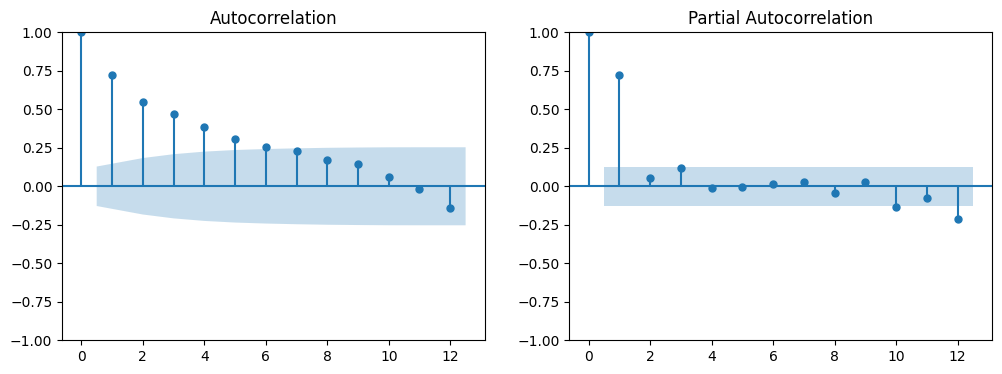

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF and PACF plots for seasonal difference
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(df.Anual, lags=12, ax=ax[0])
plot_pacf(df.Anual, lags=12, ax=ax[1])
plt.show()

En la gráfica de autocorrelación podemos observar como la mitad muestran que son estadisticamente significativos y positivos. Podemos ver como el crecimiento esta correlacionado positivamente con su propio crecimitento, es decir, que si en un mes esta creciendo, entonces es probable que los siguientes meses también lo haga.

En conclusión, en ambas gráficas podemos inferir que el comportamiento del pasado, es un buen indicador de lo que esta sucediendo actualmente en terminos de crecimiento anual.

***El Dfuller test nos dio un pvalue menor a 0.05, por lo tanto D=1; d=0 y p=1; q-0***


In [13]:
D=1
d=0
p=1
q=0

## SARIMA

In [14]:
P=0
Q=0

Los componentes del modelo a usar se describen de la siguiente manera:

D=1 y d=0 indican una diferenciacion estacional de orden 1 y ninguna diferenciación no estacional

p=1 y q=0 indican un componente autorregresivo no estacional de orden 1 y ningún componente de media móvil no estacionaria

P=0 y Q=0 indican que no hay componentes autorregresivos ni de media móvil estacionales.

In [15]:
model_sarima = sm.tsa.statespace.SARIMAX(df['log'], order=(p,d,q), seasonal_order=(P, D, Q, 12), trend='c',  simple_differencing=True)
model_sarima = model_sarima.fit(disp=0)
print(model_sarima.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                           DS12.log   No. Observations:                  222
Model:             SARIMAX(1, 0, 0)x(0, 0, 0, 12)   Log Likelihood                 313.098
Date:                            Wed, 15 Nov 2023   AIC                           -620.195
Time:                                    22:00:39   BIC                           -609.987
Sample:                                         0   HQIC                          -616.074
                                            - 222                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0053      0.004      1.351      0.177      -0.002       0.013
ar.L1          0.7247      0.035   

Tras hacer el modelo, podemos observar como se hizo un modelo SARIMA con un componente autorregresivo (AR) de orden 1 y una diferencia no estacional de orden 0. Y un periodo estacional de 12 meses, porque estamos visualizando anualmente.

Podemos observar como el Intercept es de 0.0053, lo que nos dice que la actividad industrial crezca un 0.53% cada mes a largo plazo. Es decir, si todas las demás influencias y variables son nulas, este valor constante de 0.0059 representa el crecimiento mensual esperado del índice industrial.

El coeficiente de ar.L1 nos dio 0.72 lo que significa una correlación positiva y que si es significativo. El 72% del crecimiento actual puede ser explicado por el crecimiento pasado.
Mientreas que la varianza del error (sigma2) es de 0.0035.



- Run the ACF and PACF of the residuals/errors of the model to check whether the errors is a white noise series. In other words, if there is no significant autocorrelations of the errors.

In [16]:
residuals = model_sarima.resid
residuals

24     0.075945
25    -0.034591
26    -0.008793
27     0.119473
28    -0.033035
         ...   
241   -0.027391
242    0.028926
243   -0.061636
244    0.040264
245   -0.007009
Length: 222, dtype: float64

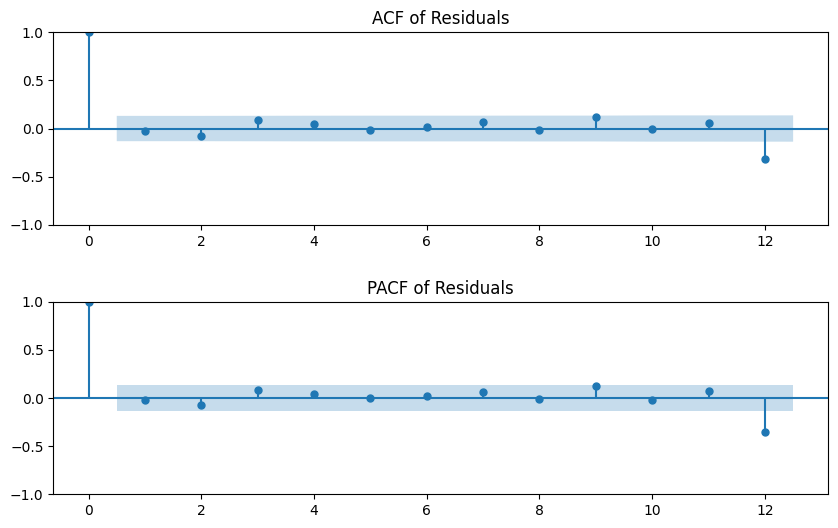

In [17]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))
sm.graphics.tsa.plot_acf(residuals, lags=12, ax=ax1)
fig.subplots_adjust(hspace=0.4)
sm.graphics.tsa.plot_pacf(residuals, lags=12, ax=ax2)

ax1.set_title('ACF of Residuals')
ax2.set_title('PACF of Residuals')
plt.show()

Al analizar las gráficas podemos notar que existe una correlación negativa que es estadísticamente significativa, es decir, va más allá de lo que podríamos esperar por azar. Esto es específicamente en el Lag 12.


Para abordar esta correlación negativa, podemos agragr un componente adicional a nuestro modelo. Esto implica considerar la influencia de los datos que ocurrieron exactamente 12 períodos antes. Para esto se debe agregar un término de media móvil estacional (Q=1) al modelo. Este ajuste tiene como objetivo capturar y tener en cuenta la influencia estacional especíifica que ocurre en intervalos de 12 periodos en la serie.

## SARIMA Versión Q=1

In [18]:
Q = 1
model_sarima2 = sm.tsa.statespace.SARIMAX(df['log'], order=(p,d,q), seasonal_order=(P, D, Q, 12), trend='c',  simple_differencing=True)
model_sarima2 = model_sarima2.fit(disp = 0)
print(model_sarima2.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                       
Dep. Variable:                             DS12.log   No. Observations:                  222
Model:             SARIMAX(1, 0, 0)x(0, 0, [1], 12)   Log Likelihood                 337.579
Date:                              Wed, 15 Nov 2023   AIC                           -667.157
Time:                                      22:00:42   BIC                           -653.546
Sample:                                           0   HQIC                          -661.662
                                              - 222                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0040      0.002      2.294      0.022       0.001       0.007
ar.L1          0.77

Ahora con este modelo actualizado podemos observar que el intercept es de 0.0040. Con esto podemos decir que se espera que la actividad industrial continúe creciendo a un ritmo del 0.40% por mes a largo plazo. Este valor nos proporciona una indicación de la tendencia general de crecimiento en la actividad industrial.

De igual manera al modelo anterior, el coeficiente de ar.L1, que es de 0.7702, observamos que aproximadamente el 77% de lo que esta sucediendo actualmente en la actividad industrial puede explicarse por lo que sucedió en el mes anterior. En otras palabras, existe una fuerte relación y dependencia entre los valores actuales y los valores del mes anterior.

Volvemos a correr el ACF and PACF de los residuales para ver si ahora si hay white noise

In [19]:
residuals2 = model_sarima2.resid
residuals2

24     0.077732
25    -0.036835
26    -0.008286
27     0.120938
28    -0.036422
         ...   
241   -0.033608
242    0.050399
243   -0.017796
244    0.066987
245   -0.031470
Length: 222, dtype: float64

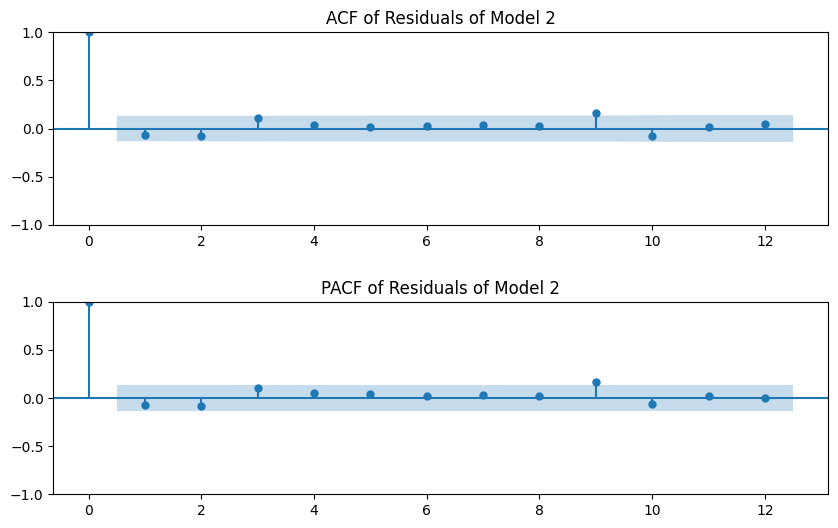

In [20]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))
sm.graphics.tsa.plot_acf(residuals2, lags=12, ax=ax1)
fig.subplots_adjust(hspace=0.4)
sm.graphics.tsa.plot_pacf(residuals2, lags=12, ax=ax2)

ax1.set_title('ACF of Residuals of Model 2')
ax2.set_title('PACF of Residuals of Model 2')
plt.show()

Ahora al modificarl el valor de Q a 1 en nuestro modelo, podemos observar como los doagramas muestran que el lag12 ahora se encuentra dentro del área de significancia. Esto indica que al hacer el ajuste de la Q, hemos logrado capturar y explcar de manera más efectiva la correlación estacional en los datos.

Ahora podemos explorar los resultados al cambiar la q a 1 para evaluar cómo afecta y así saber la necesidad o efectividad de incluir términos de media móvil no estacional adicionales en el modelo.

## SARIMA Versión q = 1

In [21]:
q = 1
model_sarima3 = sm.tsa.statespace.SARIMAX(df['log'], order=(p,d,q), seasonal_order=(P, D, Q, 12), trend='c',  simple_differencing=True)
model_sarima3 = model_sarima3.fit(disp = 0)
print(model_sarima3.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                           DS12.log   No. Observations:                  222
Model:             SARIMAX(1, 0, 1)x(0, 0, 1, 12)   Log Likelihood                 338.774
Date:                            Wed, 15 Nov 2023   AIC                           -667.549
Time:                                    22:00:49   BIC                           -650.535
Sample:                                         0   HQIC                          -660.680
                                            - 222                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0029      0.002      1.763      0.078      -0.000       0.006
ar.L1          0.8372      0.050   

En el modelo podemos observar los siguientes coeficientes que proporcionan información valiosa sobre la dinámica de la serie:

- El intercept de 0.0029, nos sugiere que en promedio, la serie tiende a mantenerse alrededor de ese valor considerando otros aspectos del modelo. Es como un punto de referencia.
- El coeficiente autoregresivo de orden 1 es de 0.8372, este nos revela una relación positiva entre el valor acutal de la serie de tiempo y el valor obervado en el período anterior. En pocas palabras, si la actividad industrial mostró un aumento reciente, es probable que veamos otro aumento. Esto nos sugiere cierta persistencia en los patrones de crecimiento en la actividad industrial de Queretaro.
- El coeficiente de media móvil nos dio -0.1683, y aunque es un valor relativamente bajo, señala una relación negativa entre el nivel actual de actividad industrial y los errores pasados. Si la actividad industrial experimentó dificultades en el pasado, el nivel actual tiende a ser mayor para corregir esas dificultades. Esto podría reflejar una capacidad de recuperación en la actividad industrial de Queretaro.

Ahora con este modelo podemos ver como ha ido mejorando desde nuestro primer modelo.
El modelo final tiene un mejor ajuste da los datos en función del Log Likelihood y el AIC más bajos. Como se ajusta mejor a nuestros datos, ahora intentaremos hacer predicciones con nuestro modelo.

In [22]:
residuals3 = model_sarima3.resid
residuals3

24     0.077439
25    -0.035665
26    -0.015232
27     0.118306
28    -0.024273
         ...   
241   -0.033938
242    0.047899
243   -0.010824
244    0.065405
245   -0.025569
Length: 222, dtype: float64

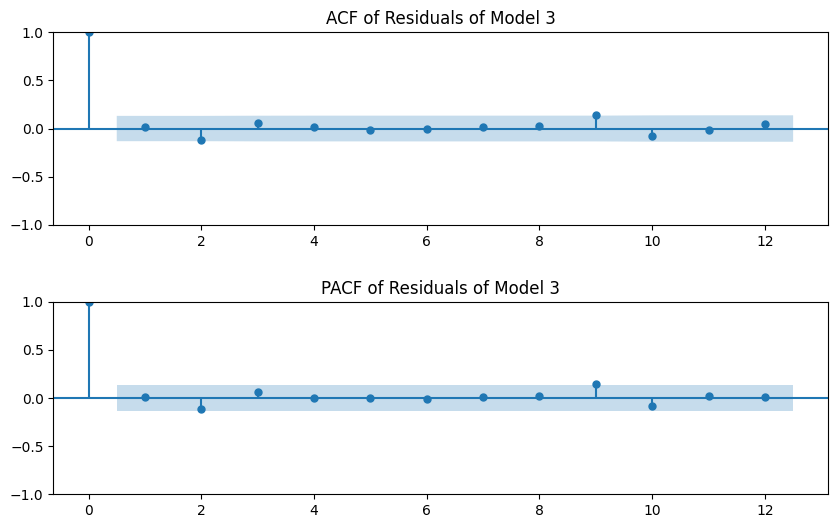

In [23]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))
sm.graphics.tsa.plot_acf(residuals3, lags=12, ax=ax1)
fig.subplots_adjust(hspace=0.4)
sm.graphics.tsa.plot_pacf(residuals3, lags=12, ax=ax2)

ax1.set_title('ACF of Residuals of Model 3')
ax2.set_title('PACF of Residuals of Model 3')
plt.show()

En este tercer modelo podemos observar como no hay más variables significativas, entonces podríamos decir que llegamos a al white noise.

Ahora el examinar este tercer modelo, nos damos cuenta que no hay más variables significativas. Esto nos dice que hemos llegado a lo que se le conoce como white noise. Es decir, hemos llegado a un punto donde no hay correlacion en los datos.

En pocas palabras, el comportamiento de la actividad industrial en Querétaro, segun nuesto modelo, podría estar dominado por factores impredecibles o aleatorios que nol hemos capturdo.

## Predicciones

In [24]:
modelo_final = sm.tsa.statespace.SARIMAX(df['Indicadores'], order=(p,d,q), seasonal_order = (P,D,Q,12),  trend='c')
modelo_final_summ = modelo_final.fit()
y = modelo_final_summ.predict(start=0, end=(len(df)+25))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [25]:
df = df[['Indicadores', 'Periodo']]
df

,Indicadores,Periodo
12,66.045678,2004/01
13,65.668412,2004/02
14,65.394662,2004/03
15,66.930978,2004/04
16,61.722965,2004/05
...,...,...
241,89.168194,2023/02
242,103.384331,2023/03
243,91.876916,2023/04
244,101.002534,2023/05


In [26]:
df = df.append(pd.Series([math.nan,'2023/07'], index=['Indicadores','Periodo']), ignore_index=True)
df = df.append(pd.Series([math.nan,'2023/08'], index=['Indicadores','Periodo']), ignore_index=True)
df = df.append(pd.Series([math.nan,'2023/09'], index=['Indicadores','Periodo']), ignore_index=True)
df = df.append(pd.Series([math.nan,'2023/10'], index=['Indicadores','Periodo']), ignore_index=True)
df = df.append(pd.Series([math.nan,'2023/11'], index=['Indicadores','Periodo']), ignore_index=True)
df = df.append(pd.Series([math.nan,'2023/12'], index=['Indicadores','Periodo']), ignore_index=True)
df = df.append(pd.Series([math.nan,'2024/01'], index=['Indicadores','Periodo']), ignore_index=True)
df = df.append(pd.Series([math.nan,'2024/02'], index=['Indicadores','Periodo']), ignore_index=True)
df = df.append(pd.Series([math.nan,'2024/03'], index=['Indicadores','Periodo']), ignore_index=True)
df = df.append(pd.Series([math.nan,'2024/04'], index=['Indicadores','Periodo']), ignore_index=True)
df = df.append(pd.Series([math.nan,'2024/05'], index=['Indicadores','Periodo']), ignore_index=True)
df = df.append(pd.Series([math.nan,'2024/06'], index=['Indicadores','Periodo']), ignore_index=True)
df = df.append(pd.Series([math.nan,'2024/07'], index=['Indicadores','Periodo']), ignore_index=True)
df = df.append(pd.Series([math.nan,'2024/08'], index=['Indicadores','Periodo']), ignore_index=True)
df = df.append(pd.Series([math.nan,'2024/09'], index=['Indicadores','Periodo']), ignore_index=True)
df = df.append(pd.Series([math.nan,'2024/10'], index=['Indicadores','Periodo']), ignore_index=True)
df = df.append(pd.Series([math.nan,'2024/11'], index=['Indicadores','Periodo']), ignore_index=True)
df = df.append(pd.Series([math.nan,'2024/12'], index=['Indicadores','Periodo']), ignore_index=True)
df = df.append(pd.Series([math.nan,'2025/01'], index=['Indicadores','Periodo']), ignore_index=True)
df = df.append(pd.Series([math.nan,'2025/02'], index=['Indicadores','Periodo']), ignore_index=True)
df = df.append(pd.Series([math.nan,'2025/03'], index=['Indicadores','Periodo']), ignore_index=True)
df = df.append(pd.Series([math.nan,'2025/04'], index=['Indicadores','Periodo']), ignore_index=True)
df = df.append(pd.Series([math.nan,'2025/05'], index=['Indicadores','Periodo']), ignore_index=True)
df = df.append(pd.Series([math.nan,'2025/06'], index=['Indicadores','Periodo']), ignore_index=True)
df = df.append(pd.Series([math.nan,'2025/07'], index=['Indicadores','Periodo']), ignore_index=True)

<ipython-input-26-463b455139f2>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series([math.nan,'2023/07'], index=['Indicadores','Periodo']), ignore_index=True)
<ipython-input-26-463b455139f2>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series([math.nan,'2023/08'], index=['Indicadores','Periodo']), ignore_index=True)
<ipython-input-26-463b455139f2>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series([math.nan,'2023/09'], index=['Indicadores','Periodo']), ignore_index=True)
<ipython-input-26-463b455139f2>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Se

In [27]:
df['Predict'] = y
df = df.reset_index(drop = True)
df = df.set_index(['Periodo'], drop=True)

## Predicción Historíca


<Axes: xlabel='Periodo'>

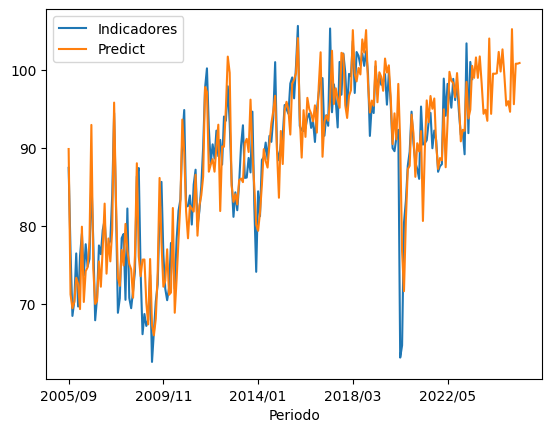

In [28]:
df.iloc[20:].plot()

## Predicciónes hasta a 2 años

<Axes: xlabel='Periodo'>

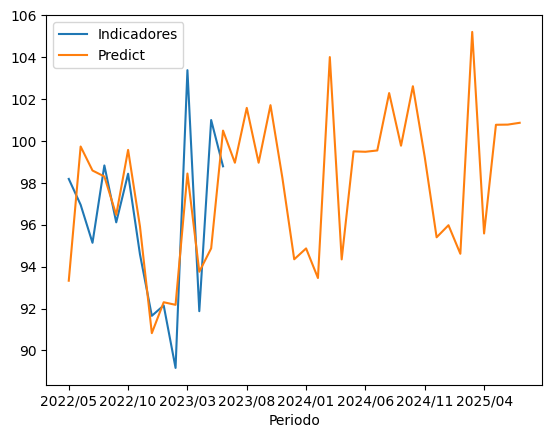

In [29]:
df.iloc[220:].plot()

## Predicciones

In [30]:
df.iloc[228:]

,Indicadores,Predict
Periodo,,
2023/01,92.152168,92.304043
2023/02,89.168194,92.180379
2023/03,103.384331,98.448843
2023/04,91.876916,93.759848
2023/05,101.002534,94.877195
2023/06,98.793566,100.498930
2023/07,NaN,98.965240
2023/08,NaN,101.583401
2023/09,NaN,98.963901


Podemos observar como se obtuvo un pronóstico de la economía. Se observa una tendencia creciente y que en el ultimo mes tiende a caer un poco.